In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
import multiprocessing as mp
from keras import optimizers,regularizers 
from sklearn import metrics 
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


# **Loading the dataset**

first we will download cifar10 dataset directly from keras. 

In [2]:
from keras.datasets import cifar10

In [3]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

**Examining the dataset**

first we check the shape of our dataset.

In [4]:
trainX.shape

(50000, 32, 32, 3)

In [5]:
trainY.shape

(50000, 1)

In [6]:
testX.shape

(10000, 32, 32, 3)

**We will use 20 % of train data as training data**

We have 50000 training and 10000 test data. this is image data set with a structure of (32,32,3) which correspond to (width, height, RGB).
For each image there is a corresponding label, which is a class index. 
We will use 20 % train data out of 50000 that is 10000. 


In [7]:
number_of_rows = int(trainX.shape[0] * 0.2)
x_train = trainX[:number_of_rows]
x_train.shape

(10000, 32, 32, 3)

In [8]:
y_train = trainY[:number_of_rows]
y_train.shape

(10000, 1)

#### Test validation split 50-50 %

In [9]:
x_test, x_val, y_test, y_val = train_test_split(testX, testY, test_size = 0.5, shuffle= True)
print(x_test.shape, x_val.shape, y_test.shape, y_val.shape)

(5000, 32, 32, 3) (5000, 32, 32, 3) (5000, 1) (5000, 1)


#### Normalization

Using to_categorical we convert the target vectors into binary class vectors. Since it is a image dataset so the dimensions will be between 0 to 1. MLP takes on 2 D (3072) dimensional vector as the input.

First we are going to use a Multilayer Perceptron to classify our images dataset.

In [10]:
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_val_norm =x_val.astype('float32')

# Normalise data
x_train_norm /= 255.0
x_test_norm /= 255.0
x_val_norm/=255.0

In [11]:
from keras.utils import to_categorical

In [12]:
x_train_mlp =np.reshape(x_train_norm, (10000, 3072))
y_train_mlp = to_categorical(y_train, num_classes = 10) 

In [13]:
x_val_mlp = np.reshape(x_val_norm, (5000, 3072))
y_val_mlp = to_categorical(y_val, num_classes = 10)

In [14]:
x_test_mlp = np.reshape(x_test_norm, (5000, 3072))
y_test_mlp = to_categorical(y_test, num_classes = 10)

In [44]:
# Build the MLP model.
model = Sequential()
model.add(Dense(512, activation='relu', input_dim = 3072))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [45]:
model.compile(optimizer=optimizers.Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
import time
start=time.time()
history = model.fit(x_train_mlp, y_train_mlp, batch_size=32, epochs=5, validation_data=(x_val_mlp,y_val_mlp), shuffle =True, verbose =1)
end=time.time()
model_time=end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 19s 2ms/step - loss: 2.1526 - accuracy: 0.2055 - val_loss: 1.9649 - val_accuracy: 0.2788
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 1.9830 - accuracy: 0.2707 - val_loss: 1.9067 - val_accuracy: 0.3022
Epoch 3/5
10000/10000 [==============================] - 17s 2ms/step - loss: 1.9488 - accuracy: 0.2810 - val_loss: 1.8609 - val_accuracy: 0.3376
Epoch 4/5
10000/10000 [==============================] - 19s 2ms/step - loss: 1.9042 - accuracy: 0.2890 - val_loss: 1.8468 - val_accuracy: 0.3452
Epoch 5/5
10000/10000 [==============================] - 19s 2ms/step - loss: 1.8872 - accuracy: 0.3041 - val_loss: 1.8451 - val_accuracy: 0.3236
Total training time is 1.52 minute


**Plot Loss Vs Epochs**

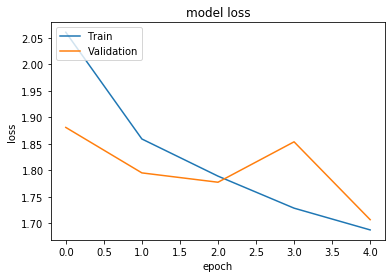

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

**Plot Accuracy Vs Epochs**

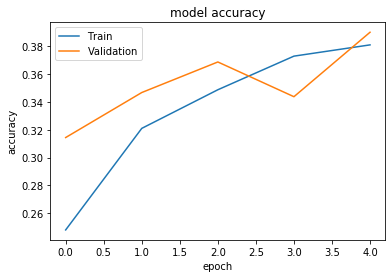

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [33]:
score = model.evaluate(x_test_mlp, y_test_mlp, batch_size=32, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 1.72366015625 / Test accuracy: 0.38339999318122864


### **CNN_part 1**

**Preparing the dataset**

In [21]:
x_test, x_val, y_test, y_val = train_test_split(testX, testY, test_size = 0.5, random_state = 42)
print(x_test.shape, x_val.shape, y_test.shape, y_val.shape)

(5000, 32, 32, 3) (5000, 32, 32, 3) (5000, 1) (5000, 1)


In [22]:
y_train_cnn = to_categorical(y_train, num_classes=10)
y_test_cnn = to_categorical(y_test, num_classes=10)
y_val_cnn = to_categorical(y_val, num_classes=10)
x_train_cnn = x_train.astype('float32')
x_test_cnn = x_test.astype('float32')
x_val_cnn = x_val.astype('float32')
x_train_cnn /= 255
x_test_cnn /= 255

In [23]:
print("Shape of training data:")
print(x_train_cnn.shape)
print(y_train_cnn.shape)
print("Shape of validation data:")
print(x_val_cnn.shape)
print(y_val_cnn.shape)
print("Shape of test data:")
print(x_test_cnn.shape)
print(y_test_cnn.shape)

Shape of training data:
(10000, 32, 32, 3)
(10000, 10)
Shape of validation data:
(5000, 32, 32, 3)
(5000, 10)
Shape of test data:
(5000, 32, 32, 3)
(5000, 10)


**Creating the CNN Model**

We will use two convolutional layers, each with 64 filters a kernel size of (3,3) and ReLU activation function. We will use padding same and 2 fully connected dense layer with 512 units and sigmoid activation function. At last we will use output layer i.e no of classes =10 and softmax activiaction function, since we are solving classification problem.

In [24]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same',input_shape=(32, 32, 3)))
model.add(Conv2D(64,(3, 3),activation='relu', padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'sigmoid'))
model.add(Dense(units = 512, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))

Model.summary gives the model summary

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               33554944  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 33,861,450
Trainable params: 33,861,450
Non-trainable params: 0
__________________________________________

Model.Compile the model, where  we will use adam optimizer with 0.001 learning rate. Here we define categorical_crossentropy loss function (used for single label categorization) and accuracy as an evaluation matrics.

In [26]:
model.compile(optimizer=optimizers.Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

**Trainning the CNN_1 Model**

In [27]:
import time
start=time.time()
cnn = model.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=5, validation_data=(x_val_cnn,y_val_cnn), shuffle = True)
end=time.time()
model_time=end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

NameError: name 'batch_size' is not defined

**Plot Loss Vs Epochs**

In [ ]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


**Plot Accuracy Vs Epochs**

In [ ]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


**Evaluation on Test Data**

In [ ]:
score = model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

As we can see, the CNN reached significantly higher accuracy than the MLP classifier, but overfitting occured during the training of our model. To avoid this, the use of some regularization techniques would be advised. So we will train our next model using dropout layer and maxpooling2D.

# **PART 3 CNN with dropout Layer**

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(64, kernel_size=(3, 3), padding = 'same',activation='relu', input_shape= (32,32,3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64, kernel_size=(3, 3),padding = 'same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('sigmoid'))
model_2.add(Dropout(0.2))
model_2.add(Dense(512))
model_2.add(Activation('sigmoid'))
model_2.add(Dropout(0.2))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))
    

In [ ]:
model_2.summary()

In [ ]:
model_2.compile(optimizer=optimizers.Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
import time
start=time.time()
cnn_2 = model_2.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=5, validation_data=(x_val_cnn,y_val_cnn), shuffle = True)
end=time.time()
model_time=end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

**Plot Loss Vs Epochs**

In [ ]:
plt.plot(cnn_2.history['loss'])
plt.plot(cnn_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

**Plot Accuracy Vs Epochs**

In [ ]:
plt.plot(cnn_2.history['accuracy'])
plt.plot(cnn_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
score = model_2.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Classification Matrix